# **Descrizione Generale**

Questo script consente di stimare in modo **approssimato l'integrale definito** di una funzione reale su un intervallo `[a, b]`, utilizzando il **metodo Montecarlo**. L'approccio si basa sulla generazione di punti casuali all'interno di un rettangolo contenente la funzione e sul calcolo della proporzione dei punti che cadono sotto il grafico della funzione.

L’algoritmo è valido **solo per funzioni limitate** su un intervallo finito.
Non è adatto a:
*   Funzioni che tendono a ±∞ (es. asintoti verticali).
*   Funzioni con discontinuità non trascurabili.
*   Intervalli infiniti o domini indefiniti.

È efficace per stime rapide, ma la precisione cresce lentamente e dipende fortemente dal numero di punti generati.










### **Installazione delle librerie**

Installa le librerie necessarie per eseguire il codice in ambienti come Google Colab:
*   `numpy`: per il calcolo numerico e la generazione di numeri casuali.
*   `matplotlib`: per la visualizzazione grafica dei risultati.

In [ ]:
!pip install numpy matplotlib

### **Importazione dei moduli**

Importa le seguenti librerie:
*   `math`: funzioni matematiche standard (es. *sin*, *cos*, *sqrt*, ecc.).
*   `numpy`: supporto per array e numeri casuali.
*   `matplotlib.pyplot`: per tracciare grafici statici.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### **Inserimento della funzione da parte dell’utente**

*   L’utente inserisce una funzione in forma di stringa, es. `x**2 + math.sin(x)`.
*   La funzione `f(x)` valuta dinamicamente questa espressione grazie a `eval()`, in modo sicuro, limitando l’accesso solo a `x` e al modulo `math`.

In caso di errore nella valutazione, viene restituito 0 e mostrato un messaggio.

In [ ]:
# inserisci la funzione di input

func_str = input("Inserisci la funzione in x (es: x**2 + 3): ")


def f(x):
    try:
        return eval(func_str, {"x": x, "math": math, "__builtins__": {}})
    except Exception as e:
        print(f"Errore nell'esecuzione della funzione: {e}")
        return 0


Inserisci la funzione in x (es: x**2 + 3): x**2 + 3


### **Inserimento dell’intervallo di integrazione e dei parametri**


*   Richiede all’utente gli estremi dell’intervallo `[a, b]` e il numero `n_punti` di punti casuali da generare.
*   Include un controllo degli input:

      *   `a` deve essere minore di `b`.
      *   `n_punti` deve essere positivo

In caso di input non numerici o valori non validi, mostra un messaggio d’errore.

In [ ]:
# inserisci l'intervallo della funzione e il numero di punti casuali da generare

try:
    a = float(input("Estremo inferiore dell'intervallo: "))
    b = float(input("Estremo superiore dell'intervallo: "))
    n_punti = int(input("Numero di punti casuali da generare: "))
except ValueError:
    print("Errore: inserisci numeri validi.")

if a >= b or n_punti <= 0:
    print("Errore: intervallo o numero di punti non valido.")


Estremo inferiore dell'intervallo: 1
Estremo superiore dell'intervallo: 2
Numero di punti casuali da generare: 10000


### **Calcolo del range verticale della funzione**

*   Si generano 10.000 valori equidistanti nell'intervallo `[a, b]`.
*   Si calcolano i corrispondenti valori della funzione.

*   Vengono determinati `y_min` e `y_max` per delimitare l'altezza del rettangolo in cui generare i punti Montecarlo.

Si include lo **zero** per gestire correttamente funzioni anche parzialmente negative.

In [ ]:
# trova il massimo della funzione
x_density = np.linspace(a, b, 10000) # calcoliamo 1000 valori equidistanti sulle x
y_density = [f(x) for x in x_density]

y_min = min(0, min(y_density))  # incluso lo 0 per gestire funzioni negative
y_max = max(0, max(y_density))

### **Simulazione Montecarlo**

*   Viene eseguita la generazione casuale di `n_punti` all’interno del rettangolo `[a, b] × [y_min, y_max]`.
*   Per ogni punto `(x_rand, y_rand)`, si verifica se il punto è **sotto la curva** della funzione:
    *   Se `y_rand` ha lo stesso segno di `y_func(x_rand)` e modulo minore, il punto è considerato "sotto".
*   I punti vengono salvati separatamente per:

    *   `x_under, y_under`: punti sotto la curva
    *   `x_over, y_over`: punti sopra la curva

In [ ]:
# montecarlo
count_under = 0

# array di salvataggio dei punti
x_under, y_under = [], []
x_over, y_over = [], []

for _ in range(n_punti):
    x_rand = a + (b - a) * np.random.random()
    y_rand = y_min + (y_max - y_min) * np.random.random()
    y_func = f(x_rand)

    if (y_rand >= 0 and y_rand <= y_func) or (y_rand < 0 and y_rand >= y_func):
        count_under += 1
        x_under.append(x_rand)
        y_under.append(y_rand)
    else:
        x_over.append(x_rand)
        y_over.append(y_rand)

### **Calcolo dell’integrale**

*   Calcola l’area del rettangolo che racchiude la funzione:

$$
(b - a)(y_{\text{max}} - y_{\text{min}})
$$


*   L’integrale stimato è dato da:
$$
\text{integrale} \approx \text{area rettangolo} \times \frac{\text{punti sotto}}{\text{n_punti}}
$$


*   Il risultato viene stampato con sei cifre decimali.


In [ ]:
# risultato area
area_rect = (b - a) * (y_max - y_min)
integral = area_rect * (count_under / n_punti)

print(f"\nStima dell'integrale geometrico di {func_str} da {a} a {b} con {n_punti} punti: {integral:.6f}")


Stima dell'integrale geometrico di x**2 + 3 da 1.0 a 2.0 con 10000 punti: 5.297600


### **Visualizzazione grafica dei risultati**

*   Visualizza:
    *   Il grafico della funzione.
    *   I punti Montecarlo, distinguendo tra:
        *   Verde: punti sotto la curva.
        *   Rosso: punti sopra la curva.
*   Aggiunge titolo, griglia, assi e legenda per una chiara lettura.

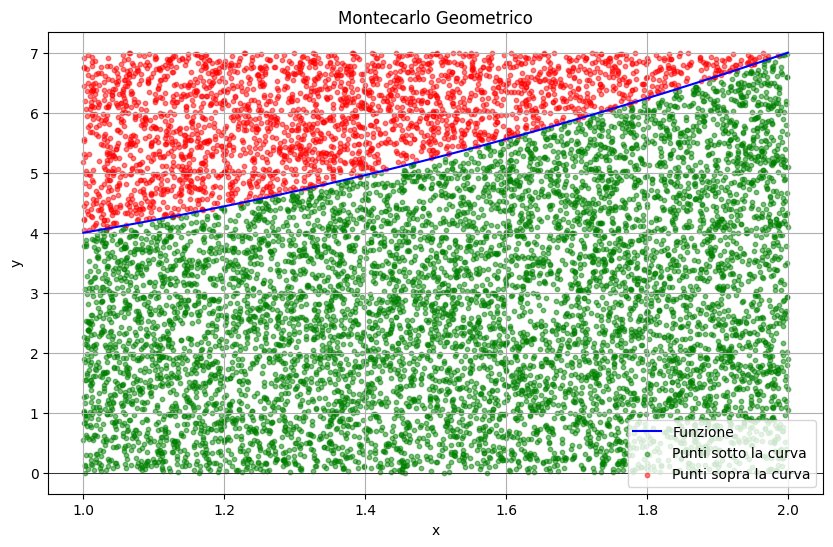

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_density, y_density, label="Funzione", color="blue")
plt.axhline(0, color="black", linewidth=0.5)
plt.scatter(x_under, y_under, color="green", s=10, alpha=0.5, label="Punti sotto la curva")
plt.scatter(x_over, y_over, color="red", s=10, alpha=0.5, label="Punti sopra la curva")
plt.title("Montecarlo Geometrico")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()